
# <p style="margin-top: 5rem; background-color:black; font-family:calibri; font-size:120%; color:white; text-align:center; border-radius:15px 50px; padding:10px">Machine Learning Course Project</p>

## <p style="margin-top: -5rem; border: 2px solid black; font-family:calibri; font-size:120%; color:black; text-align:center; border-radius: 5rem; padding:10px">Classification Techniques Comparsion</p>


## <p style="margin-top: -5rem; border: 2px solid black; font-family:calibri; font-size:120%; color:black; text-align:center; border-radius: 5rem; padding:10px">Rami Majadbeh & Nasser Awwad</p>





# **Table Of Contents**

<div style="border-radius:10px; border:black solid; padding: 15px; background-color: #f1f3f4; font-size:110%; text-align:left">
<a id="contents_tabel"></a>
<h3 align="left"><font color='maroon'>Table of Contents:</font></h3>

* [**Step 1 | Import libraries**](#step-1)
* [**Step 2 | Read Dataset**](#step-2)
* [**Step 3 | Data Overview**](#step-3)
   - [Step 3.1 | Dataset Basic Information](#step-31)
   - [Step 3.2 | Statistical Description of Categorical Variables](#step-32)
   - [Step 3.3 | Statistical Description of Numerical Variables](#step-33)
     - [Results & Discussion](#step-331)
* [**Step 4 | Data Analysis**](#step-4)
   - [Step 4.1 | Categorical Variables Univariate Analysis](#step-41)
     - [Results & Discussion](#results-411)
   - [Step 4.2 | Numerical Variables Univariate Analysis](#step-42)
     - [Results & Discussion](#results--discussion-2)
   - [Step 4.3 | Feature Importance](#step-43)
     - [Step 4.3.1 | Pearson Correlation](#step-431)
       - [Results & Discussion](#step-4311)
     - [Step 4.3.2 | Categorical Features vs Target](#step-432)
       - [Results & Discussion](#step-4321)
     - [Step 4.3.3 | Numerical Features vs Target](#step-433)
       - [Results & Discussion](#results-4331)
     - [Step 4.3.4 | 3D Visualization For Most Important Features](#step-434)
* [**Step 5 | Data Preprocessing**](#step-5)
   - [Step 5.1 | Data Standardization](#step-51)
     - [Results & Discussion](#step-511)
   - [Step 5.2 | Cleaning Data From Outliers](#step-52)
* [**Step 6 | Models**](#step-6)
   - [Step 6.1 | Classification Using KNN Model](#step-61)
     - [Results & Discussion](#step-611)
     - [Results & Discussion](#step-612)
   - [Step 6.2 | Classification Using Random Forest Model](#step-62)
     - [Results & Discussion](#step-621)
   - [Step 6.3 | Classification Using SVM Model](#step-63)
     - [Results & Discussion](#step-631)


<a id="step-1"></a>
# <p style="background-color:black; font-family:calibri; font-size:120%; color:white; text-align:center; border-radius:15px 50px; padding:10px">Step 1 | Import Libraries</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from matplotlib import colors
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.base import clone
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from plotly.offline import iplot
from sklearn.neighbors import KNeighborsClassifier
import scipy.stats as stats

<a id="import"></a>
# <p style="background-color:black; font-family:calibri; font-size:120%; color:white; text-align:center; border-radius:15px 50px; padding:10px">Step 2 | Read Dataset</p>

In [2]:
# Reading the dataset
df = pd.read_csv('/kaggle/input/ml-train-dataset/train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


<a id="step-3"></a>
# <p style="background-color:black; font-family:calibri; font-size:120%; color:white; text-align:center; border-radius:15px 50px; padding:10px">Step 3 | Data Overview</p>

<a id="step-31"></a>
## Step 3.1 | Dataset Basic Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [5]:
df.duplicated().sum()

0

<a id="step-32"></a>
## Step 3.2 | Statistical Description of Categorical Variables

In [6]:
# Filter out categorical features
df_categorical = df[['price_range', 'n_cores', 'blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']].astype(str)

# Calculate number of unique values and unique values for each feature
unique_counts = df_categorical.nunique()
unique_values = df_categorical.apply(lambda x: x.unique())

# Create new dataframe with the results
pd.DataFrame({'Number of Unique Values': unique_counts, 'Unique Values': unique_values})

,Number of Unique Values,Unique Values
price_range,4,"[1, 2, 3, 0]"
n_cores,8,"[2, 3, 5, 6, 1, 8, 4, 7]"
blue,2,"[0, 1]"
dual_sim,2,"[0, 1]"
four_g,2,"[0, 1]"
three_g,2,"[0, 1]"
touch_screen,2,"[0, 1]"
wifi,2,"[1, 0]"


<a id="step-33"></a>
## Step 3.3 | Statistical Description of Numerical Variables


In [7]:
# Filter out numerical features
df_numerical = df.drop(df_categorical.columns, axis=1)

# Generate descriptive statistics
df_numerical.describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.5,439.4,501.0,851.8,1226.0,1615.2,1998.0
clock_speed,2000.0,1.5,0.8,0.5,0.7,1.5,2.2,3.0
fc,2000.0,4.3,4.3,0.0,1.0,3.0,7.0,19.0
int_memory,2000.0,32.0,18.1,2.0,16.0,32.0,48.0,64.0
m_dep,2000.0,0.5,0.3,0.1,0.2,0.5,0.8,1.0
mobile_wt,2000.0,140.2,35.4,80.0,109.0,141.0,170.0,200.0
pc,2000.0,9.9,6.1,0.0,5.0,10.0,15.0,20.0
px_height,2000.0,645.1,443.8,0.0,282.8,564.0,947.2,1960.0
px_width,2000.0,1251.5,432.2,500.0,874.8,1247.0,1633.0,1998.0
ram,2000.0,2124.2,1084.7,256.0,1207.5,2146.5,3064.5,3998.0


<a id="step-331"></a>
### Results & Discussion

* This dataset contains information from 2000 mobile phones.
We have 21 variables including 20 independent variables and 1 dependent variable which is price_range.

* There is no missing value in the dataset.

* There is no duplicated rows in the dataset.


* We have 8 categorical variables: n_cores , price_range, blue, dual_sim, four_g, three_g, touch_screen, wifi.

* We have 13 numeric variables: battery_power, clock_speed, fc, int_memory, m_dep, mobile_wt, pc, px_height, px_width, ram, talk_time, sc_h, sc_w

<a id="step-4"></a>
# <p style="background-color:black; font-family:calibri; font-size:120%; color:white; text-align:center; border-radius:15px 50px; padding:10px">Step 4 | Data Analysis</p>

<a id="step-41"></a>
## Step 4.1 | Categorical Variables Univariate Analysis


In [8]:
fig = make_subplots(rows=2, cols=4, specs=[[{'type':'domain'}]*4]*2, vertical_spacing=0.01, horizontal_spacing=0.01)

# Loop through all the features and add the pie chart to the subplot
for i, feature in enumerate(df_categorical.columns):
    value_counts = df_categorical[feature].value_counts()
    labels = value_counts.index.tolist()
    values = value_counts.values.tolist()

    cmap = colors.LinearSegmentedColormap.from_list("Viridis", plt.cm.viridis.colors)
    norm = colors.Normalize(vmin=0, vmax=len(labels))
    color_list = [colors.rgb2hex(cmap(norm(i))) for i in range(len(labels))]

    # Create the pie chart
    pie_chart = go.Pie(
        labels=labels,
        values=values,
        hole=0.6,
        marker=dict(colors=color_list, line=dict(color='white', width=3)),
        textposition='inside',
        textinfo='percent+label',
        title=feature,
        title_font=dict(size=25, color='black', family='Calibri')
    )

    # Add the pie chart to the subplot
    row = i // 4 + 1
    col = i % 4 + 1
    fig.add_trace(pie_chart, row=row, col=col)

# Update the layout
fig.update_layout(showlegend=False, height=600, width=1000,
                   title={
                          'text':"Distribution of Categorical Variables",
                          'y':0.95,
                          'x':0.5,
                          'xanchor':'center',
                          'yanchor':'top',
                          'font': {'size':28, 'color':'black', 'family':'Calibri'}
                         })

# Show the plot
fig.show()


<a id="step-411"></a>
### Results & Discussion

* The dataset contains an equal number of mobile phones in each of the 4 price range classes, indicating a completely balanced dataset.

* The mobile phones in the dataset have a similar distribution in terms of having or not having Bluetooth, 4G, touch screen, Wifi, as well as supporting two SIM cards or not and the number of processing cores used.

* Approximately 76% of the mobile phones in the dataset are compatible with 3G.

<a id="step-42"></a>
## Step 4.2 | Numerical Variables Univariate Analysis


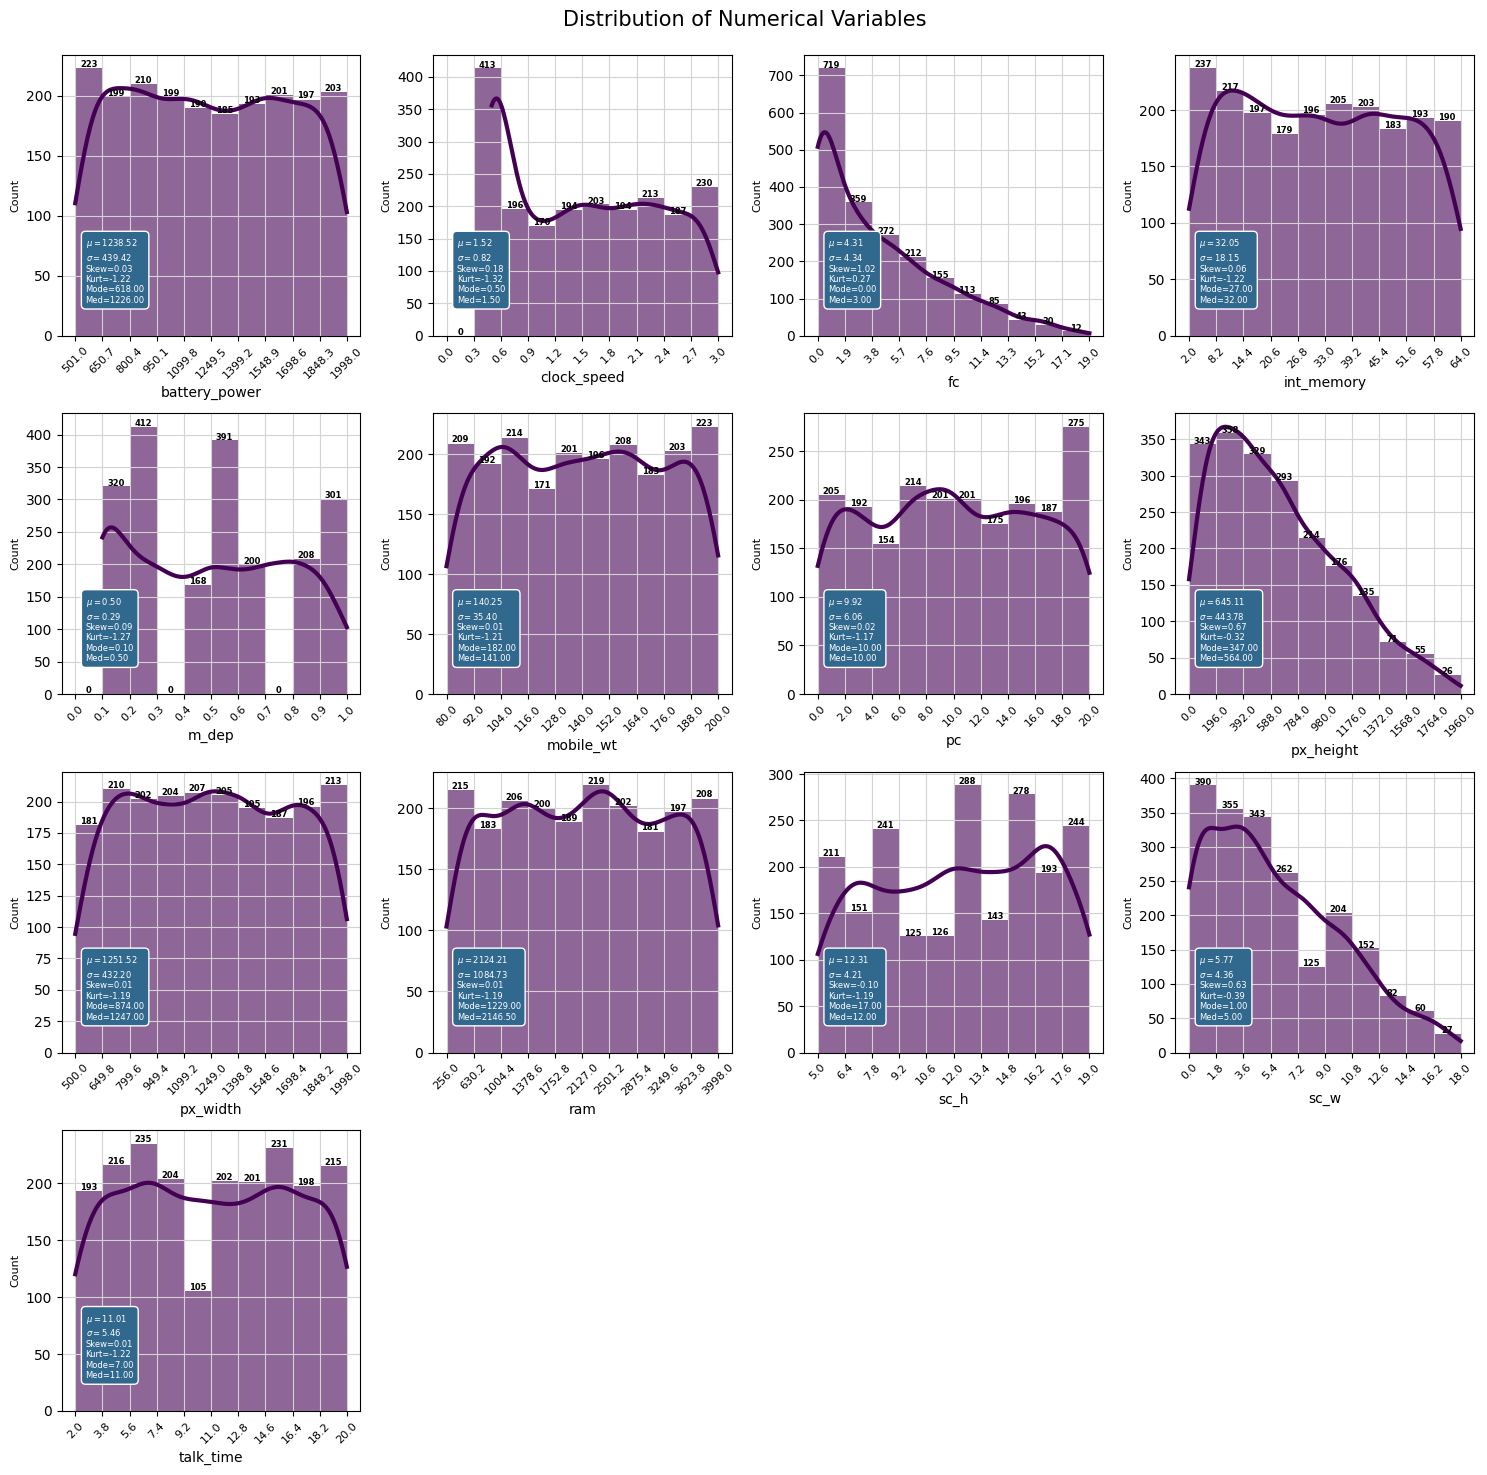

In [22]:
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(15,15), dpi=100)
c = '#440154'

for i, col in enumerate(df_numerical.columns):
    x = i // 4
    y = i % 4
    values, bin_edges = np.histogram(df_numerical[col],
                                     range=(np.floor(df_numerical[col].min()), np.ceil(df_numerical[col].max())))
    graph = sns.histplot(data=df_numerical, x=col, bins=bin_edges, kde=True, ax=ax[x, y],
                         edgecolor='none', color=c, alpha=0.6, line_kws={'lw': 3})
    ax[x, y].set_xlabel(col, fontsize=10)
    ax[x, y].set_ylabel('Count', fontsize=8)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45, fontsize=8)
    ax[x, y].grid(color='lightgrey')
    for j, p in enumerate(graph.patches):
        ax[x, y].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                          ha='center', fontsize=6, fontweight="bold")
    textstr = '\n'.join((
        r'$\mu=%.2f$' % df_numerical[col].mean(),
        r'$\sigma=%.2f$' % df_numerical[col].std(),
        r'Skew=%.2f' % stats.skew(df_numerical[col]),
        r'Kurt=%.2f' % stats.kurtosis(df_numerical[col]),
        r'Mode=%.2f' % df_numerical[col].mode().iloc[0],
        r'Med=%.2f' % df_numerical[col].median()
    ))
    ax[x, y].text(0.08, 0.35, textstr, transform=ax[x, y].transAxes, fontsize=6, verticalalignment='top',
                  color='white', bbox=dict(boxstyle='round', facecolor='#31688e', edgecolor='white', pad=0.5))

ax[3, 1].axis('off')
ax[3, 2].axis('off')
ax[3, 3].axis('off')
plt.suptitle('Distribution of Numerical Variables', fontsize=15)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()


<a id="step-421"></a>
#### Results & Discussion

* It is easy to comprehend the statistical values of each feature by examining the graphs provided.

* These values include the minimum and maximum values, as well as the average and standard deviation.

* Noise-like values, mostly close to zero, are observed in some features such as px_height (Pixel Resolution Height) and sc_w (Screen Width of mobile in cm)

<a id="step-43"></a>
## Step 4.3 | Feature Importance

<a id="step-431"></a>
### Step 4.3.1 | Pearson Correlation

**Pearson Correlation** is a statistical measure that calculates the strength and direction of the linear relationship between two variables, with values ranging from -1 (perfect negative correlation) to 1 (perfect positive correlation).

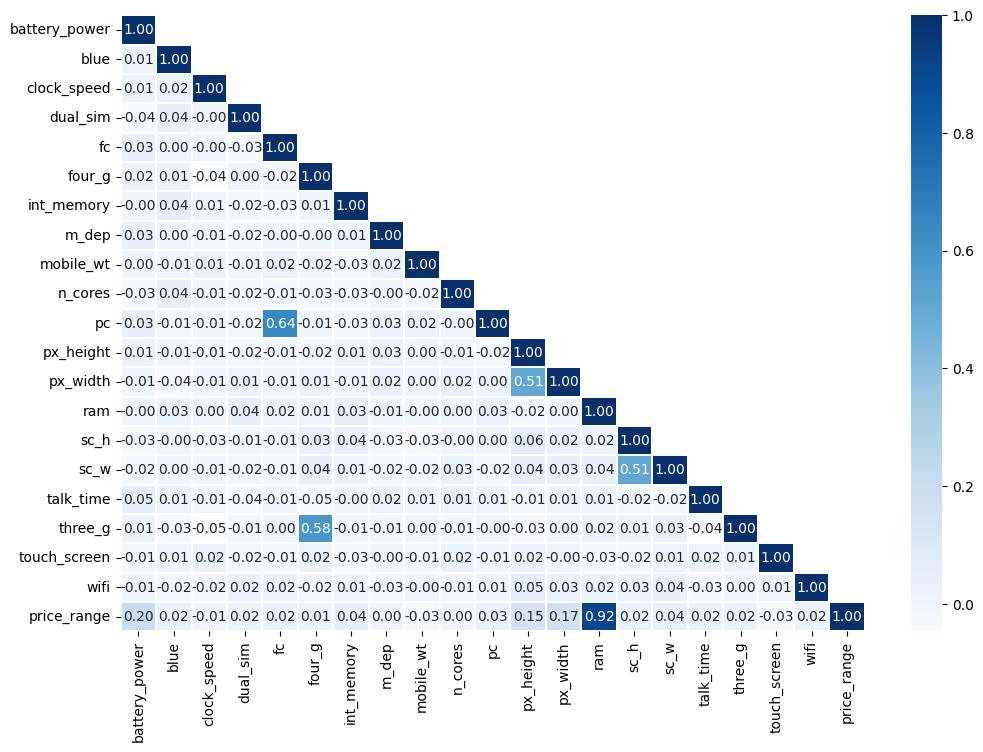

In [10]:
# Define a colormap
orangered_cmap = LinearSegmentedColormap.from_list('orangered', ['#FFECEC','orangered'])

# Calculation of the Spearman correlation
target = 'price_range'
df_ordered = pd.concat([df.drop(target,axis=1), df[target]],axis=1)
corr = df_ordered.corr()

# Create a mask so that we see the correlation values only once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask,1)] = True

# Plot the heatmap correlation
plt.figure(figsize=(12,8))
sns.heatmap(corr, mask=mask, annot=True, cmap="Blues", fmt='.2f', linewidths=0.2)


plt.show()



<a id="step-311"></a>
#### Results & Discussion

* The correlation between price_range and ram is very strong (ρ = 0.92).
* Although the correlation between price_range and the other features is low, this should not be used as a basis to eliminate these features as the pearson correlation only measures the linear relationship between two variables.

* Of all the features, pc and fc have the highest correlation with each other (ρ = 0.64).

<a id="step-432"></a>
### Step 4.3.2 | Categorical Features vs Target

<ipython-input-11-4be837d80584>:8: MatplotlibDeprecationWarning:



Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.




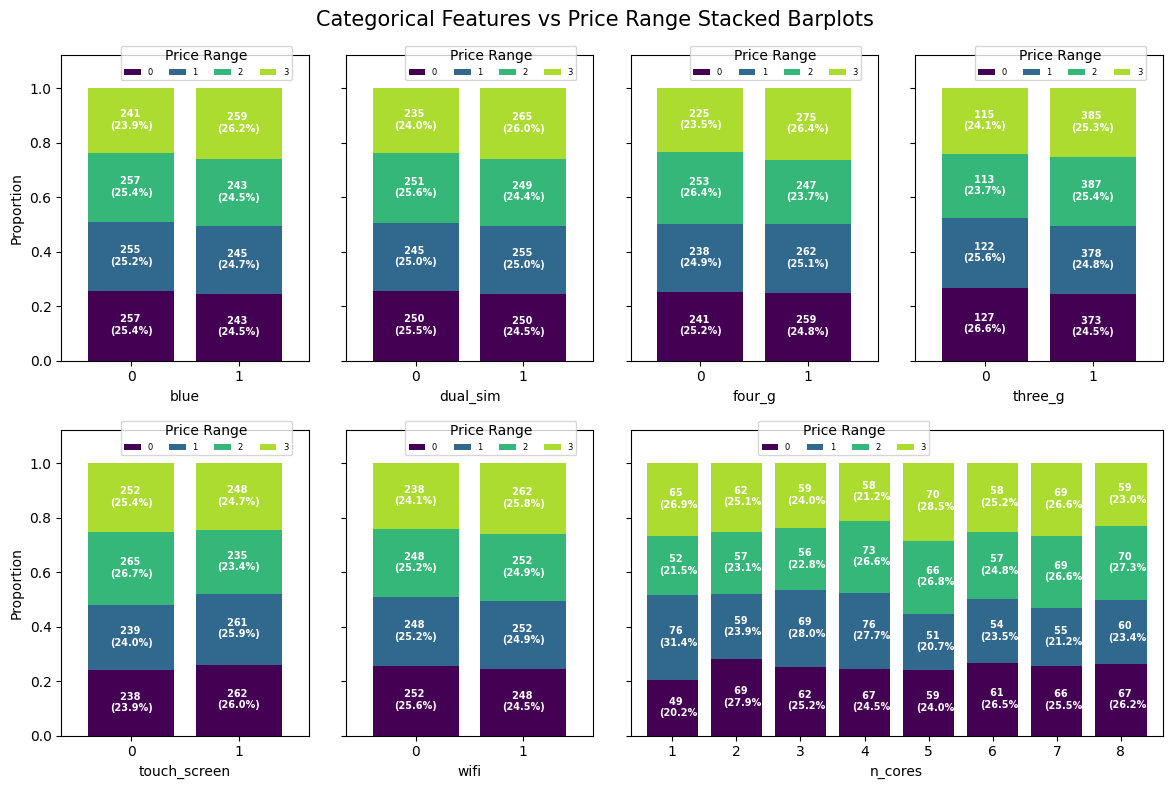

In [11]:
Target = 'price_range'

Cat_Features = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'n_cores']

# Create a 2x4 grid of subplots
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(12,8), dpi=100)

ax[1,2] = plt.subplot2grid((2,4), (1,2), colspan=2)

for i,col in enumerate(Cat_Features):

    cross_tab = pd.crosstab(index=df[col], columns=df[Target])
    cross_tab_prop = pd.crosstab(index=df[col], columns=df[Target], normalize='index')

    cmp = ListedColormap(['#440154', '#31688e', '#35b779','#addc30'])

    x, y = i//4, i%4
    cross_tab_prop.plot(kind='bar', ax=ax[x,y], stacked=True, width=0.8, colormap=cmp,
                        legend=False, ylabel='Proportion', sharey=True)

    for idx, val in enumerate([*cross_tab.index.values]):
        for (proportion, count, y_location) in zip(cross_tab_prop.loc[val],cross_tab.loc[val],cross_tab_prop.loc[val].cumsum()):
            ax[x,y].text(x=idx-0.20, y=(y_location-proportion)+(proportion/2)-0.03,
                         s = f'   {count}\n({np.round(proportion * 100, 1)}%)',
                         color = "white", fontsize=7, fontweight="bold")

    ax[x,y].legend(title='Price Range', loc=(0.24,0.92), fontsize=6, ncol=4)
    ax[x,y].set_ylim([0,1.12])
    ax[x,y].set_xticklabels(ax[x,y].get_xticklabels(), rotation=0)
    ax[x,y].set_ylabel('Proportion', fontsize=10)
    ax[x,y].set_xlabel(col, fontsize=10)

plt.suptitle('Categorical Features vs Price Range Stacked Barplots', fontsize=15)
plt.tight_layout()
plt.show()

<a id="step-4321"></a>
#### Results & Discussion

> In the plot displayed above, it can be observed that three_g, n_cores, and touch_screen are the categorical features that have a higher impact on the target. This is due to the fact that by modifying the category of these features, the percentage of samples belonging to each target class has changed significantly.

<a id="step-433"></a>
### Step 4.3.3 | Numerical Features vs Target

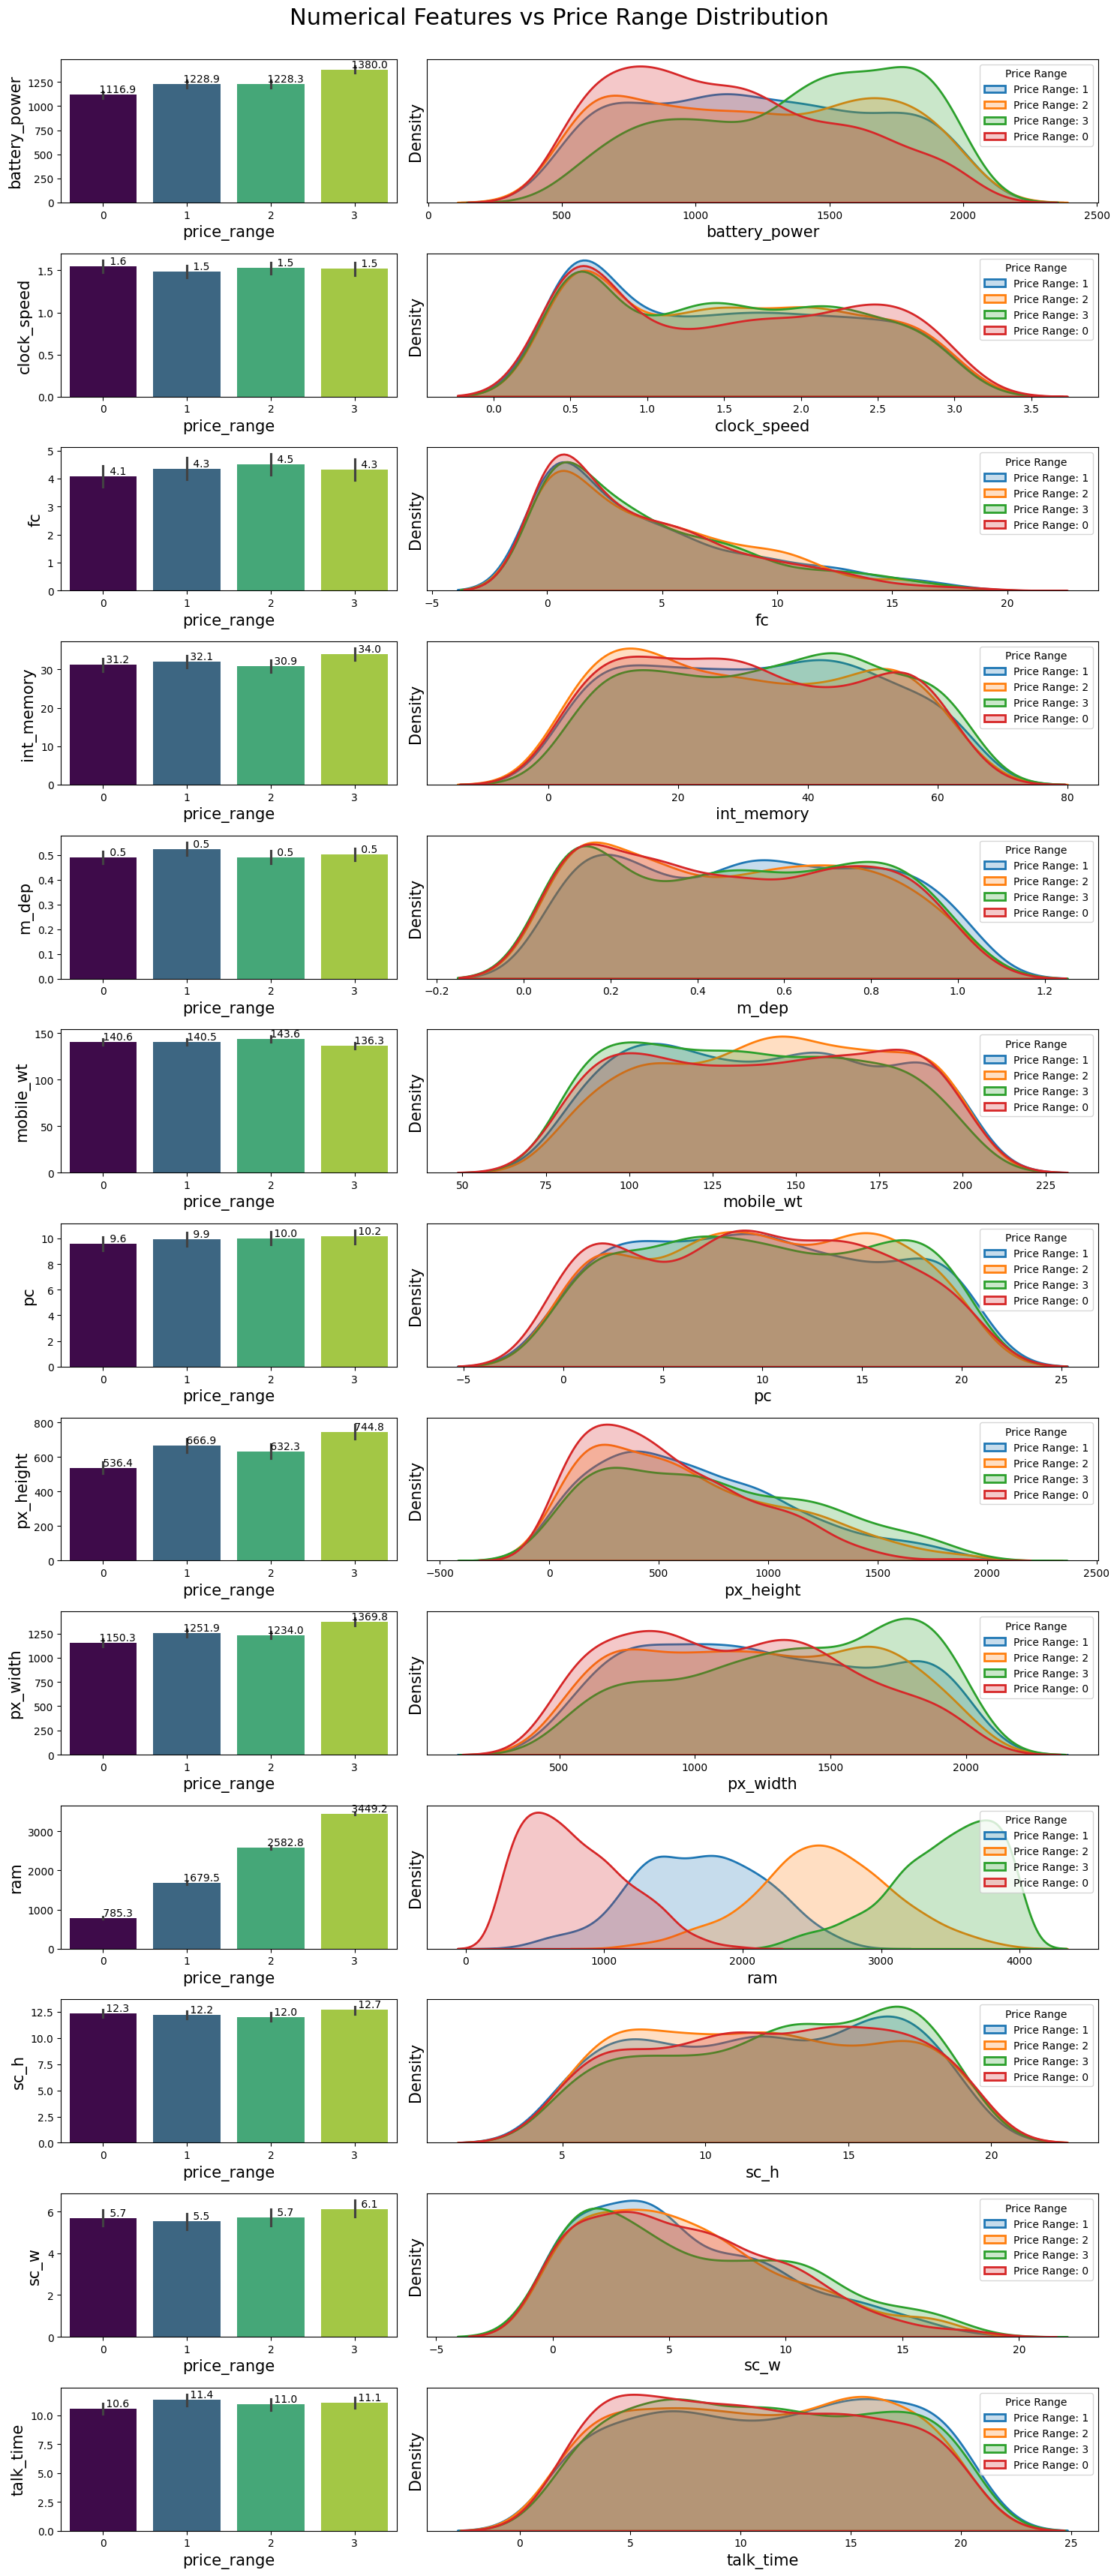

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# the numerical features
Num_Features = df_numerical.columns

custom_colors = ['#440154', '#31688e', '#35b779', '#addc30']

fig, ax = plt.subplots(13, 2, figsize=(15, 35), gridspec_kw={'width_ratios': [1, 2]})

# Barplot
for i, col in enumerate(Num_Features):
    graph = sns.barplot(data=df, x=Target, y=col, hue=Target, ax=ax[i, 0], palette=custom_colors, legend=False)

    for pr in df[Target].unique():
        sns.kdeplot(data=df[df[Target] == pr], x=col, fill=True, linewidth=2, ax=ax[i, 1], label=f'Price Range: {pr}')

    ax[i, 1].set_yticks([])
    ax[i, 1].legend(title='Price Range', loc='upper right')

    for cont in graph.containers:
        graph.bar_label(cont, fmt='         %.1f')

for i in range(len(ax)):
    for j in range(len(ax[i])):
        ax[i, j].set_xlabel(ax[i, j].get_xlabel(), fontsize=15)
        ax[i, j].set_ylabel(ax[i, j].get_ylabel(), fontsize=15)

plt.suptitle('Numerical Features vs Price Range Distribution', fontsize=22)
plt.tight_layout()
plt.subplots_adjust(top=0.96)
plt.show()


<a id="step-4331"></a>
#### Results & Discussion

> The diagram above shows numerical features that have an impact on the target. Ram is the feature with the greatest impact, followed by battery power, px_height, and px_width. The reason for this is that the distribution and average amount of data belonging to each class of the target have changed significantly in these features.

<a id="step-434"></a>
### Step 4.3.4 | 3D Visiualization For Most Important Features

In [9]:
import plotly.express as px
fig = px.scatter_3d(df.head(1000), x='ram', y='battery_power', z='px_width', color='price_range')
fig.show()

<a id="step-5"></a>
# <p style="background-color:black; font-family:calibri; font-size:120%; color:white; text-align:center; border-radius:15px 50px; padding:10px">Step 5 | Data Preprocessing</p>

<a id="step-51"></a>
## Step 5.1 | Data Standrization

In [14]:
# Assuming df is your original DataFrame
scaler = StandardScaler()

target = df['price_range']

df_scaled = df.drop('price_range', axis=1)

# Apply StandardScaler to the entire DataFrame
df_scaled = pd.DataFrame(scaler.fit_transform(df_scaled), columns=df_scaled.columns)

<a id="step-511"></a>
### Results & Discussion

 > Rescaling the features so that they have the properties of a standard normal distribution with a mean of 0 and a standard deviation of 1, to ensure that the features are on a similar scale, which is very important for certain machine learning algorithms.

<a id="step-52"></a>
## Step 5.2 | Cleaning Data From Outliers

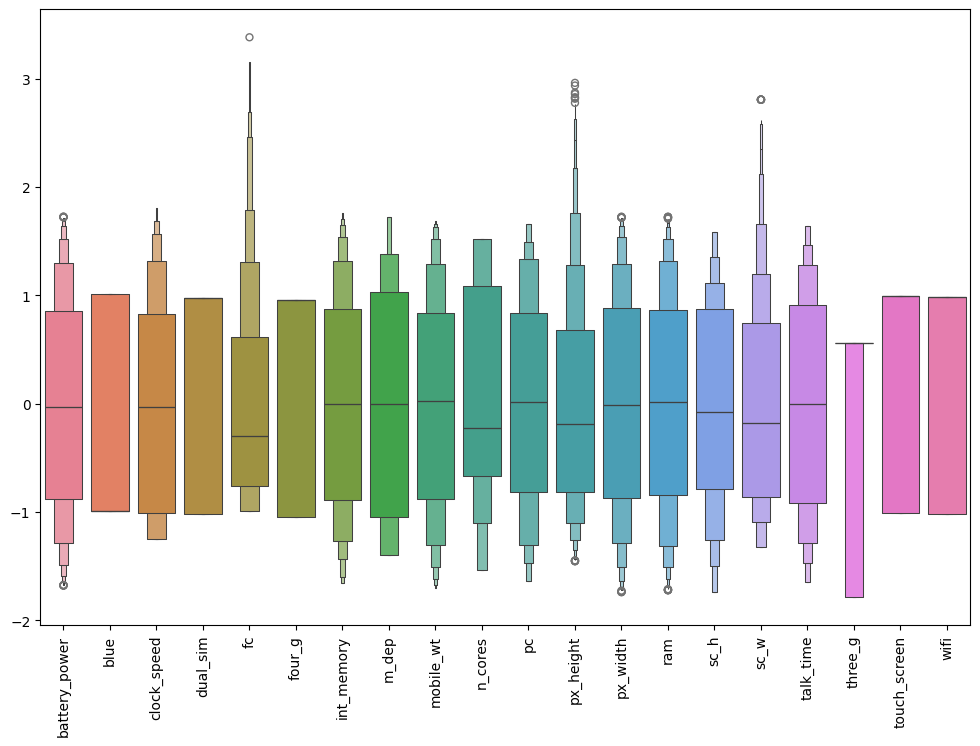

In [15]:
col_names = list(df_scaled.columns)

# Detecting outliers, looking at the scaled features
plt.figure(figsize=(12, 8))
sns.boxenplot(data=df_scaled, palette="husl")
plt.xticks(rotation=90)
plt.show()

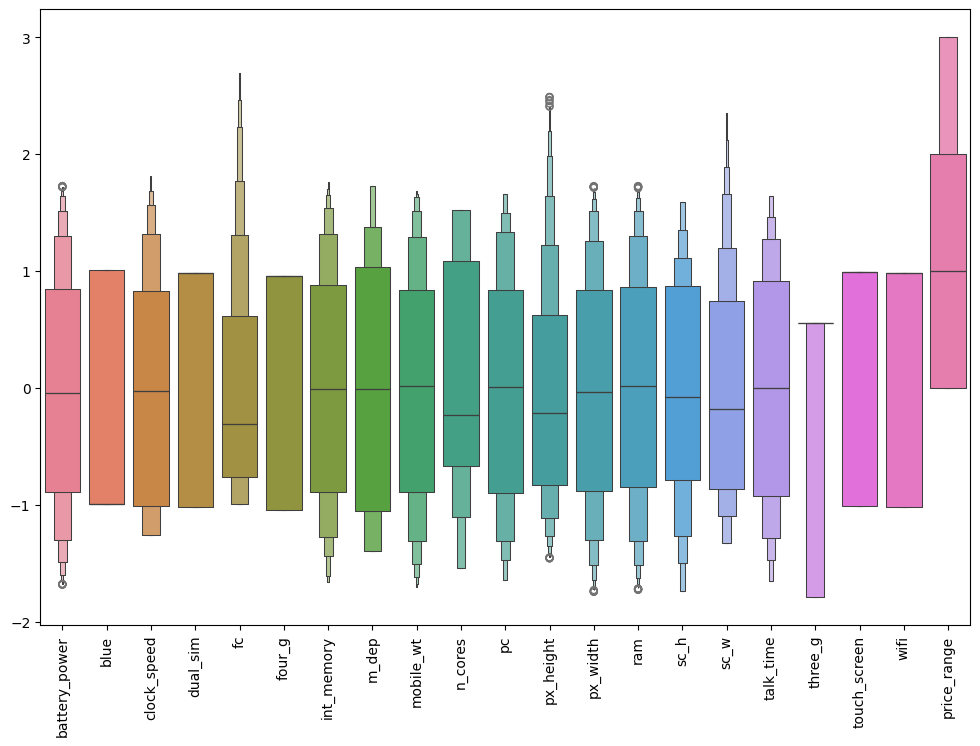

In [16]:

#Dropping with outlier
df_scaled["price_range"] = target

df_scaled = df_scaled[(df_scaled["fc"]<2.9)&(df_scaled["fc"]>-2)]
df_scaled = df_scaled[(df_scaled["px_height"]<2.5)&(df_scaled["px_height"]>-2)]
df_scaled = df_scaled[(df_scaled["sc_w"]<2.5)&(df_scaled["sc_w"]>-2)]


# Detecting outliers, looking at the scaled features
plt.figure(figsize=(12, 8))
sns.boxenplot(data=df_scaled, palette="husl")
plt.xticks(rotation=90)
plt.show()

<a id="step-6"></a>
# <p style="background-color:black; font-family:calibri; font-size:120%; color:white; text-align:center; border-radius:15px 50px; padding:10px">Step 6 | Models</p>

**Evaluation Functions**

In [17]:
models = {}

In [18]:
def metrics_calculator(clf, X_train, X_test, y_train, y_test, model_name):
    '''
    This function calculates all desired performance metrics for a given model on training and test data.
    '''

    # Calculate metrics for training set
    y_pred_train = clf.predict(X_train)
    train_metrics = pd.Series([accuracy_score(y_train, y_pred_train),
                               precision_score(y_train, y_pred_train, average='macro'),
                               recall_score(y_train, y_pred_train, average='macro'),
                               f1_score(y_train, y_pred_train, average='macro'),
                               roc_auc_score(y_train, clf.predict_proba(X_train), multi_class='ovr')],
                              index=['Accuracy', 'Macro Precision', 'Macro Recall', 'Macro F1-score', 'ROC AUC'],
                              name='Training Set')

    # Calculate metrics for test set
    y_pred_test = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test, average='macro')
    recall = recall_score(y_test, y_pred_test, average='macro')
    f1 = f1_score(y_test, y_pred_test, average='macro')
    roc = roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr')

    models[model_name] = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'ROC AUC' : roc
    }

    test_metrics = pd.Series([accuracy, precision, recall, f1, roc],
                             index=['Accuracy', 'Macro Precision', 'Macro Recall', 'Macro F1-score', 'ROC AUC'],
                             name='Test Set')

    result = pd.concat([train_metrics, test_metrics], axis=1)
    result = (result * 100).round(2).astype(str) + '%'
    return result

In [19]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.preprocessing import label_binarize

def model_evaluation(clf, X_train, X_test, y_train, y_test, model_name):

    # Set font scale
    sns.set(font_scale=1.5)

    # Create figure and subplots
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, dpi=90, figsize=(18, 5))

    # Report desired results as a summary in the form of a table
    result = metrics_calculator(clf, X_train, X_test, y_train, y_test, model_name)
    table = ax1.table(cellText=result.values, colLabels=result.columns, rowLabels=result.index, loc='center')
    table.scale(0.6, 4.2)
    table.set_fontsize(12)
    ax1.axis('tight')
    ax1.axis('off')
    ax1.set_title('{} Performance'.format(model_name), fontsize=18, y=1.1)

    for key, cell in table.get_celld().items():
        if key[0] == 0:
            cell.set_color('#083877')
            cell.set_text_props(fontsize=12, color='white', fontweight='bold')

    # Plot confusion matrix for test set
    ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, colorbar=False, cmap="Blues", ax=ax2)
    ax2.set_title('Confusion Matrix for Test Data')
    ax2.grid(False)

    # Plot ROC curve
    y_prob = clf.predict_proba(X_test)
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())
    auc_score = auc(fpr, tpr)

    ax3.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {auc_score:.2f})')
    ax3.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax3.set_xlim([0.0, 1.0])
    ax3.set_ylim([0.0, 1.05])
    ax3.set_xlabel('False Positive Rate')
    ax3.set_ylabel('True Positive Rate')
    ax3.set_title('Receiver Operating Characteristic (ROC) Curve')
    ax3.legend(loc='lower right')

    plt.tight_layout()
    plt.show()


<a id="step-61"></a>
## Step 6.1 | Classification Using KNN Model

Best Hyperparameters: {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}




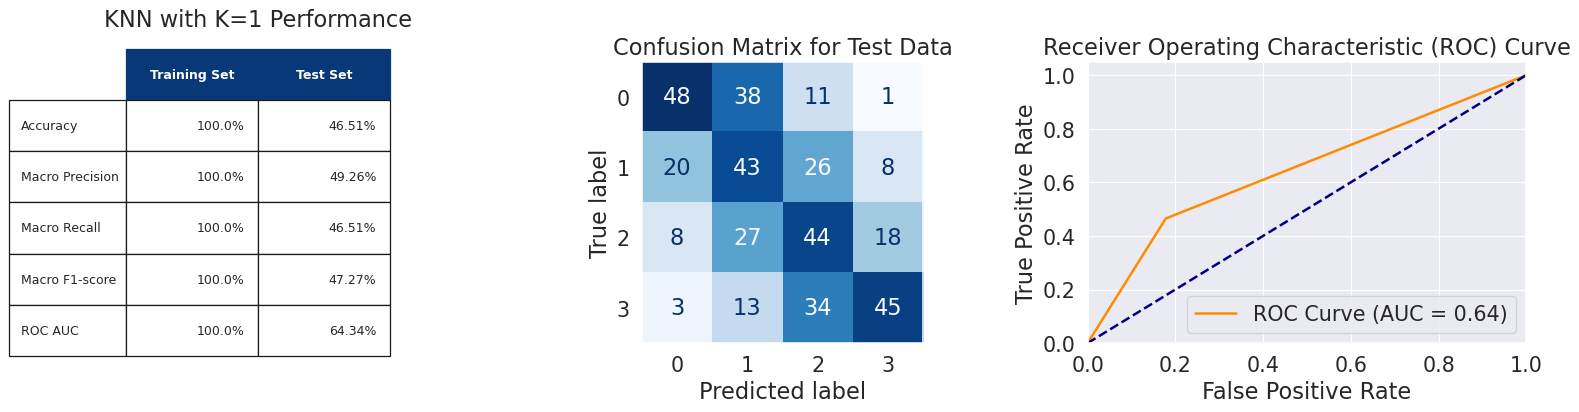

In [20]:
X = df_scaled.drop('price_range', axis=1)
y = df_scaled['price_range']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)


knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [1],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


# best model from the grid search
best_knn = grid_search.best_estimator_

y_pred = best_knn.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Best Hyperparameters:", grid_search.best_params_)
print()

model_evaluation(best_knn, X_train, X_test, y_train, y_test, 'KNN with K=1')

<a id="step-611"></a>
### Results & Discussion

> The model excels on the training set, achieving perfect precision, recall, and f1-score for each class and an overall accuracy of 1.00. However, its performance significantly drops on the test set, with macro average precision, recall, and f1-score at 0.47, 0.45, and 0.46, respectively. This discrepancy suggests potential overfitting, indicating the model's struggle to generalize to new, unseen examples.

Best Hyperparameters: {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}




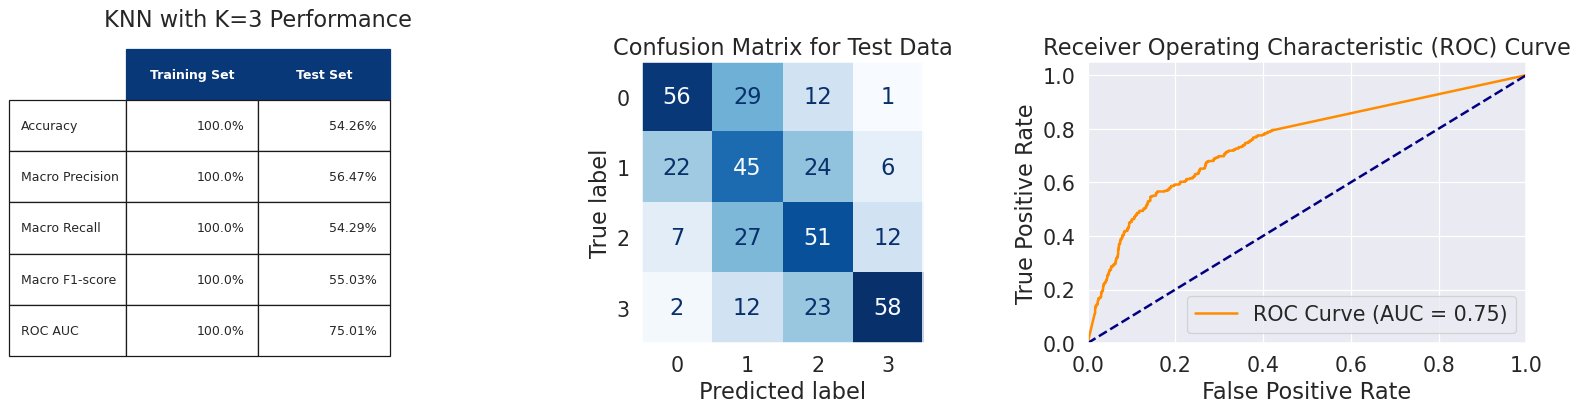

In [21]:
X = df_scaled.drop('price_range', axis=1)
y = df_scaled['price_range']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)


knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


best_knn = grid_search.best_estimator_

y_pred = best_knn.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


print("Best Hyperparameters:", grid_search.best_params_)
print()

model_evaluation(best_knn, X_train, X_test, y_train, y_test, 'KNN with K=3')

<a id="step-612"></a>
### Results & Discussion

> When k = 3, the model maintains its exceptional performance on the training set, attaining the same perfect precision, recall, and f1-score as previously, with an overall accuracy of 1.00 for the classification report. However, the model's performance decreases when applied to the test set, just like the k = 1 scenario. When compared to k = 1, the macro average precision, recall, and f1-score show a modest improvement, coming up at 0.56, 0.54, and 0.55, respectively. Even with a slight improvement in generalization, the model is still unable to fully conform to the test set.

<a id="step-62"></a>
## Step 6.2 | Classification Using Random Forest Model

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


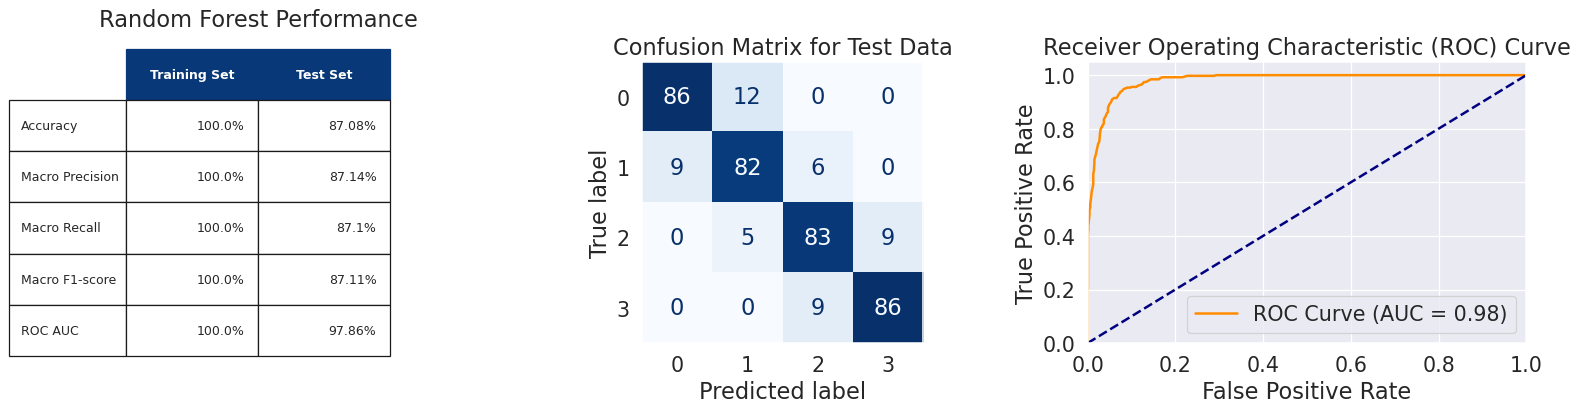

In [22]:
X = df_scaled.drop('price_range', axis=1)
y = df_scaled['price_range']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

RF = RandomForestClassifier(random_state=42, n_jobs=-1)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(RF, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model from the grid search
best_RF = grid_search.best_estimator_
y_pred = best_RF.predict(X_test)

model_evaluation(best_RF, X_train, X_test, y_train, y_test, 'Random Forest')

<a id="step-621"></a>
### Results & Discussion

> The Random Forest model displays exceptional proficiency, achieving a flawless 1.00 accuracy on the training set and maintaining strong generalization with a commendable 0.87 accuracy on the test set. Furthermore, indicating strong performance are the f1-score, precision, and recall metrics for every class in the test set. The Random Forest model performs better than the baseline KNN in terms of accuracy, recall, and f1-score in every class, highlighting its supremacy in correctly categorizing occurrences in this specific dataset. Based on the results, it can be concluded that the Random Forest model is a better fit for this classification task than the baseline KNN, offering a more accurate and consistent classification.

<a id="step-63"></a>
## Step 6.3 | Classification Using SVM Model

In [23]:
def svc_tune_hyperparameters(clf, param_grid, X_train, y_train):

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
    clf_grid.fit(X_train, y_train)
    print("Best hyperparameters:\n", clf_grid.best_params_)
    print()

    return clf_grid.best_estimator_

Best hyperparameters:

 {'C': 50, 'kernel': 'linear'}




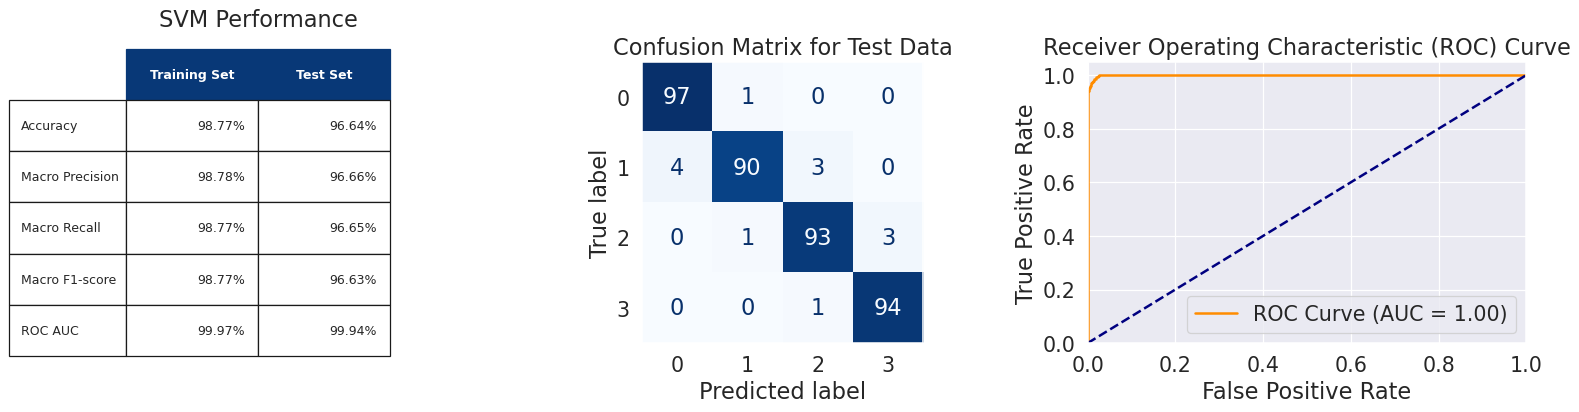

In [24]:
param_grid = {'kernel': ['linear'],'C': [ 0.1, 1, 10, 50, 100]}

X = df_scaled.drop('price_range', axis=1)
y = df_scaled['price_range']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Create a SVC object
svm = SVC(probability=True, random_state=0)

# Find the best classifier with the optimal hyperparameters
svm_optimized = svc_tune_hyperparameters(svm, param_grid, X_train, y_train)

model_evaluation(svm_optimized, X_train, X_test, y_train, y_test, 'SVM')

<a id="step-631"></a>
### Results & Discussion

> The Support Vector Classifier (SVC) demonstrates impressive performance on both the training and test sets. With excellent recall, f1-score, and precision scores for every class in the training set, it achieves an overall accuracy of 0.99. Strong performance can be seen by metrics such as precision, recall, and f1-score, which demonstrate that the model generalizes to the test set effectively.  When compared to the baseline KNN, the SVC performs better as seen by higher recall, f1-score, and precision values in every class. With a test set accuracy of 0.97, it is clear that the SVC outperforms the baseline KNN in terms of classification accuracy for this particular task.

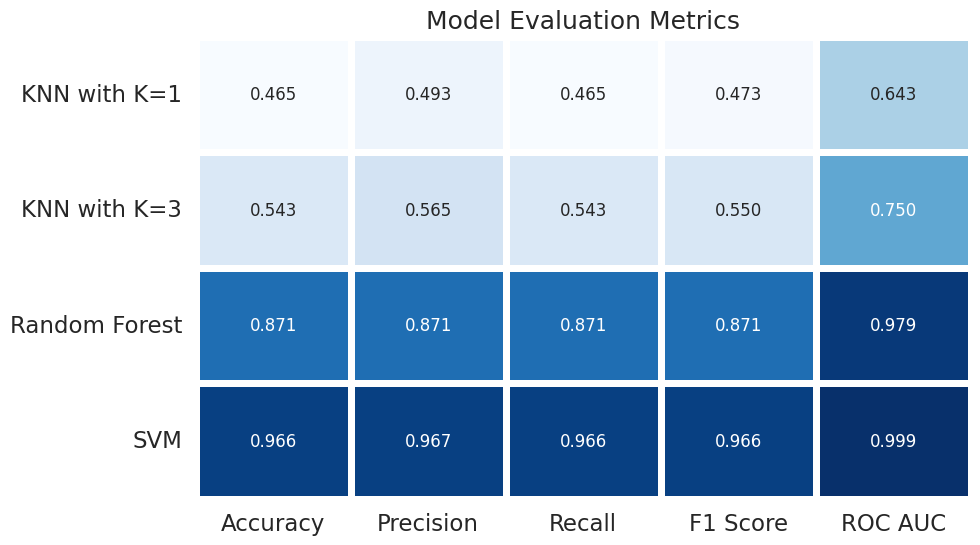

In [25]:
df_models = pd.DataFrame(models).T

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_models, annot=True, cmap="Blues", fmt='.3f', linewidths=5, cbar=False, annot_kws={"size": 12})
plt.title('Model Evaluation Metrics', fontsize=18)
plt.show()